In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv("train.csv");
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


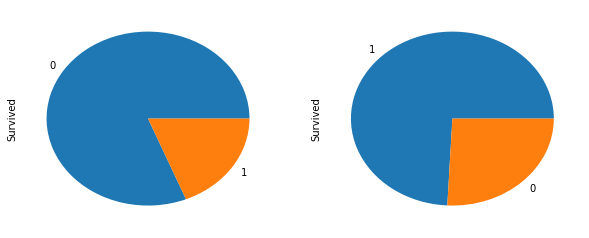

In [5]:
#### Check if the gender plays a role in survival
fig = plt.figure(figsize=(10,4))
fig.add_subplot(121)
df.Survived[df['Sex'] == 'male'].value_counts().plot(kind='pie')
fig.add_subplot(122)
df.Survived[df['Sex'] == 'female'].value_counts().plot(kind='pie')

In [6]:
#### Split the titles from the passenger names which is itself a feature but also help in calculating missing median age values
df['Name'] = df['Name'].map(lambda x: x.split(',')[1].split('.')[0].strip())
titles = df['Name'].unique()
titles

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [7]:
df['Age'].fillna(-1, inplace=True)

medians = dict()
for title in titles:
    median = df.Age[(df["Age"] != -1) & (df['Name'] == title)].median()
    medians[title] = median
for index, row in df.iterrows():
    if row['Age'] == -1:
        df.loc[index, 'Age'] = medians[row['Name']]

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Mr,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Mrs,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Miss,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,Mrs,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,Mr,male,35.0,0,0,373450,8.0500,NaN,S


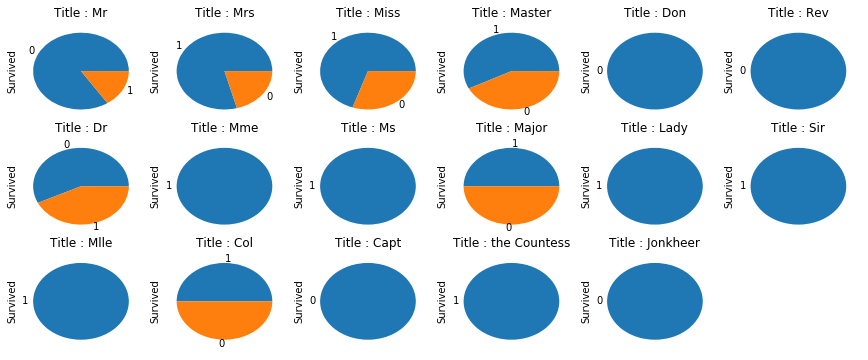

In [8]:
fig = plt.figure(figsize=(15,6))

i=1
for title in df['Name'].unique():
    fig.add_subplot(3, 6, i)
    plt.title('Title : {}'.format(title))
    df.Survived[df['Name'] == title].value_counts().plot(kind='pie')
    i += 1

In [9]:
print(df['Name'][2])

Miss


In [10]:
replacement = {
    'Don': 0,
    'Rev': 0,
    'Jonkheer': 0,
    'Capt': 0,
    'Mr': 1,
    'Dr': 2,
    'Col': 3,
    'Major': 3,
    'Master': 4,
    'Miss': 5,
    'Mrs': 6,
    'Mme': 7,
    'Ms': 7,
    'Mlle': 7,
    'Sir': 7,
    'Lady': 7,
    'the Countess': 7
}
#df['Name'] = df['Name'].replace(lambda x : replacement.get(x))

for jef in range(0,len(df['Name'])):
    df['Name'][jef]=replacement[df['Name'][jef]]
    
#for key in replacement:
#    print (key, 'corresponds to', replacement[key])
df.head()

/home/karunya-admin/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,1,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,6,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,5,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,6,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,1,male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,-1.264348,male,-0.180285,0,0,211536,13.00,NaN,S
887,888,1,1,1.070922,female,-0.783700,0,0,112053,30.00,B42,S
888,889,0,3,1.070922,female,-0.632847,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,-0.797294,male,-0.255712,0,0,111369,30.00,C148,C
890,891,0,3,-0.797294,male,0.196849,0,0,370376,7.75,NaN,Q


In [14]:
from sklearn.preprocessing import StandardScaler
df['Name'] = StandardScaler().fit_transform(df['Name'].values.reshape(-1, 1))
df['Age'] = StandardScaler().fit_transform(df['Age'].values.reshape(-1, 1))

In [15]:
df['Fare'].fillna(-1, inplace=True)
medians = dict()
for pclass in df['Pclass'].unique():
    median = df.Fare[(df["Fare"] != -1) & (df['Pclass'] == pclass)].median()
    medians[pclass] = median
for index, row in df.iterrows():
    if row['Fare'] == -1:
        df.loc[index, 'Fare'] = medians[row['Pclass']]
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,-0.797294,male,-0.557420,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,1.537975,female,0.649410,1,0,PC 17599,71.2833,C85,C
2,3,1,3,1.070922,female,-0.255712,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,1.537975,female,0.423129,1,0,113803,53.1000,C123,S
4,5,0,3,-0.797294,male,0.423129,0,0,373450,8.0500,NaN,S


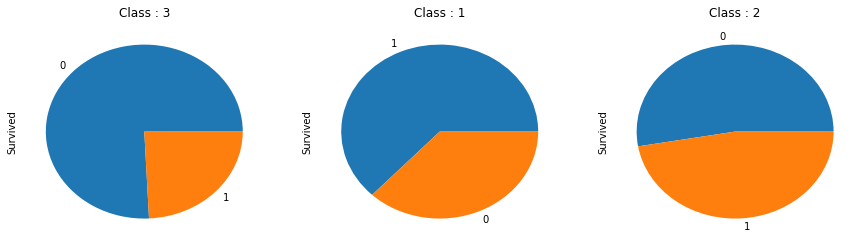

In [16]:
fig = plt.figure(figsize=(15,4))

i=1
for pclass in df['Pclass'].unique():
    fig.add_subplot(1, 3, i)
    plt.title('Class : {}'.format(pclass))
    df.Survived[df['Pclass'] == pclass].value_counts().plot(kind='pie')
    i += 1

In [17]:
df['Pclass'] = StandardScaler().fit_transform(df['Pclass'].values.reshape(-1, 1))

/home/karunya-admin/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


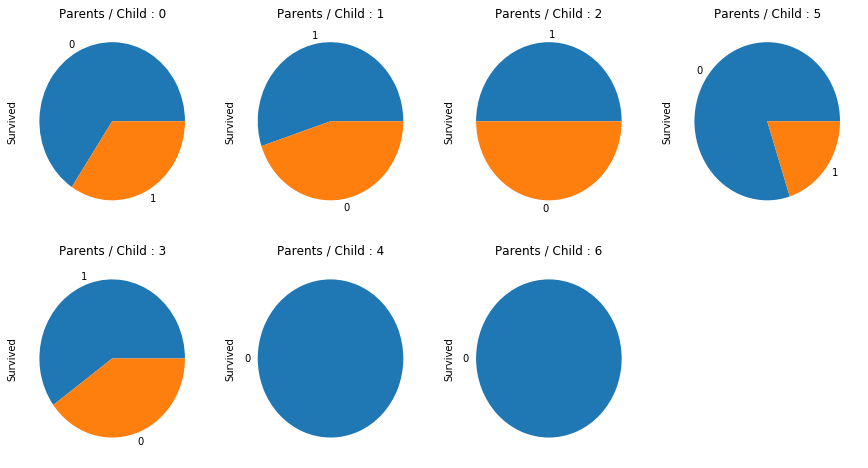

In [18]:
fig = plt.figure(figsize=(15,8))
i = 0
for parch in df['Parch'].unique():
    fig.add_subplot(2, 4, i+1)
    plt.title('Parents / Child : {}'.format(parch))
    df.Survived[df['Parch'] == parch].value_counts().plot(kind='pie')
    i += 1

In [19]:
replacement = {
    6: 0,
    4: 0,
    5: 1,
    0: 2,
    2: 3,
    1: 4,
    3: 5
}
df['Parch'] = df['Parch'].apply(lambda x: replacement.get(x))
df['Parch'] = StandardScaler().fit_transform(df['Parch'].values.reshape(-1, 1))

In [20]:
df.drop('Ticket', axis=1, inplace=True)

In [21]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,0.827377,-0.797294,male,-0.557420,1,-0.468807,7.2500,NaN,S
1,2,1,-1.566107,1.537975,female,0.649410,1,-0.468807,71.2833,C85,C
2,3,1,0.827377,1.070922,female,-0.255712,0,-0.468807,7.9250,NaN,S
3,4,1,-1.566107,1.537975,female,0.423129,1,-0.468807,53.1000,C123,S
4,5,0,0.827377,-0.797294,male,0.423129,0,-0.468807,8.0500,NaN,S


In [37]:
import sklearn
import numpy as np

In [38]:
 df['Sex'] = df['Sex'].factorize()[0]

In [39]:
del(df['Cabin'])

In [40]:
df['Embarked'] = df['Embarked'].factorize()[0]

In [41]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,0.827377,-0.797294,0,-0.557420,1,-0.468807,7.2500,0
1,2,1,-1.566107,1.537975,1,0.649410,1,-0.468807,71.2833,1
2,3,1,0.827377,1.070922,1,-0.255712,0,-0.468807,7.9250,0
3,4,1,-1.566107,1.537975,1,0.423129,1,-0.468807,53.1000,0
4,5,0,0.827377,-0.797294,0,0.423129,0,-0.468807,8.0500,0


In [64]:
#train and test

y=df['Survived']
del(df['Survived'])
X=df

In [65]:
X = X.as_matrix().astype(np.float)
#X= X.reshape(X.shape[0],1,X.shape[1])
y= y.as_matrix().astype(np.float)
#y= y.reshape(X.shape[0])

In [66]:
X_test=X[700:]
y_tets=y[700:]

In [67]:
X=X[:700]
y=y[:700]

In [68]:
print(X.shape)
print(y.shape)
print(X_test.shape)
print(y_tets.shape)

(700, 9)
(700,)
(191, 9)
(191,)


In [69]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(X) #features made unit varient
        
print(X.shape)
    
print(y.shape)

(700, 9)
(700,)


In [70]:
    
from sklearn import metrics
from sklearn import ensemble
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
scores = cross_val_score(ensemble.RandomForestClassifier(), X,y,cv=10)

In [108]:
from xgboost import XGBClassifier    
    #XGB classifier()
jeffin= XGBClassifier()
jeffin.fit(X,y)
print(jeffin.score( X,y, sample_weight=None)*100)
print(jeffin.score( X_test,y_tets, sample_weight=None)*100)

89.7142857143
83.2460732984


In [123]:
from sklearn import linear_model
regr = linear_model.LinearRegression()

# Train the model using the training sets
#y=y.astype(int)
#y_tets=y_tets.astype(int)
regr.fit(X, y)
print(regr.score( X,y, sample_weight=None)*100)


41.8413486479


In [120]:
from sklearn.naive_bayes import GaussianNB
gn=GaussianNB()
gn.fit(X, y) 
print(gn.score(X, y, sample_weight=None)*100)
print(gn.score(X_test, y_tets, sample_weight=None)*100)

79.5714285714
65.9685863874


In [125]:

def plot_roc(y_true,clf):
    from sklearn.metrics import roc_curve,auc
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_true, clf['y_pred'])
    roc_auc = auc(false_positive_rate, true_positive_rate)
    sns.set('notebook', 'whitegrid', 'dark', font_scale=1.5, font='Ricty',
        rc={"lines.linewidth": 2.5, 'grid.linestyle': '--'})
    plt.figure()
    plt.plot(false_positive_rate,true_positive_rate,color='darkorange',lw=2,label='ROC curve (AUC=%0.3f)'%roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False positive rate ')
    plt.ylabel('True Positive Rate ')
    plt.title('ROC curve for : '+clf['name'])
    plt.legend(loc="lower right")
    #plt.savefig('./results/roc/'+clf['name']+'.png')
    plt.show()
    plt.close()
          


In [126]:
import matplotlib.pylab as pylab
def plot_cm(y, clf, labels):
    from sklearn.metrics import confusion_matrix
    cm=confusion_matrix(y,clf['y_pred'])
    percent = (cm*100.0)/np.array(np.matrix(cm.sum(axis=1)).T) 
    print ('\nConfusion Matrix Stats : '+ clf['name'])
    for i, label_i in enumerate(labels):
        for j, label_j in enumerate(labels):
            print ("%s/%s: %.2f%% (%d/%d)" % (label_i, label_j, (percent[i][j]), cm[i][j], cm[i].sum()))
    fig = plt.figure(figsize=(20,10))
    ax = fig.add_subplot(111)
    ax.grid(b=False)
    cax = ax.matshow(percent, cmap=plt.cm.Blues)
    pylab.title('Confusion matrix : '+ clf['name']+' : '+str(clf['acc'])+'%\n')
    fig.colorbar(cax)
    ax.set_xticklabels([' '] + labels)
    ax.set_yticklabels(['   '] + labels)
    ax.text(0,0,percent[0][0],va='center',ha='center',bbox=dict(fc='w',boxstyle='round,pad=1'))
    ax.text(0,1,percent[0][1],va='center',ha='center',bbox=dict(fc='w',boxstyle='round,pad=1'))
    ax.text(1,0,percent[1][0],va='center',ha='center',bbox=dict(fc='w',boxstyle='round,pad=1'))
    ax.text(1,1,percent[1][1],va='center',ha='center',bbox=dict(fc='w',boxstyle='round,pad=1'))
    pylab.xlabel('Predicted')
    pylab.ylabel('Actual')
    #pylab.savefig('./results/'+clf['name']+'.png')
pylab.show()

In [127]:
def show_cm(y, clf, labels):
    from sklearn.metrics import confusion_matrix
    cm=confusion_matrix(y,clf['y_pred'])
    percent = (cm*100.0)/np.array(np.matrix(cm.sum(axis=1)).T) 
    print ('Confusion Matrix Stats : ',clf['name'],'\t Accuracy ',clf['acc'])
    for i, label_i in enumerate(labels):
        for j, label_j in enumerate(labels):
            print ("%s/%s: %.2f%% (%d/%d)" % (label_i, label_j, (percent[i][j]), cm[i][j], cm[i].sum()))

In [128]:
import os
import string
import time
import csv
from sklearn import cross_validation
def stratified_cv(X, y, clf_class, clf_name, shuffle=True, n_folds=3, **kwargs):
    from sklearn.metrics import accuracy_score
    stratified_k_fold = cross_validation.StratifiedKFold(y, n_folds=n_folds, shuffle=shuffle) #it will have each folds with index of y. Use this index to get corresponding x values 
    y_pred = y.copy()
    clf = clf_class(**kwargs)
    
    start_time=time.time()
    #Iterate throught the folds. we will have ii part with 90% of train data index and jj part with 10% of test data index.
    for ii, jj in stratified_k_fold:
        X_train, X_test = X[ii], X[jj]
        y_train = y[ii]
        clf.fit(X_train,y_train)
        y_pred[jj] = clf.predict(X_test)
    accuracy = accuracy_score(y_pred,y)*100
    print(str(clf_name)+"\t" +"%.3f"%(time.time()-start_time)+"\t"+ str(accuracy))
    return {'name':clf_name,'y_pred':y_pred ,'acc':accuracy}

In [129]:
print("Classifier\t Execution Time \t Accuracy")
GNB=stratified_cv(X, y,GaussianNB,"Gaussian NB ")
XGB=stratified_cv(X,y,XGBClassifier,"XGBoost")

Lr=stratified_cv(X,y,linear_model.Ridge,"Lrmodel")

Classifier	 Execution Time 	 Accuracy
Gaussian NB 	0.005	78.5714285714
XGBoost	0.057	80.2857142857
Lrmodel	0.002	63.1428571429


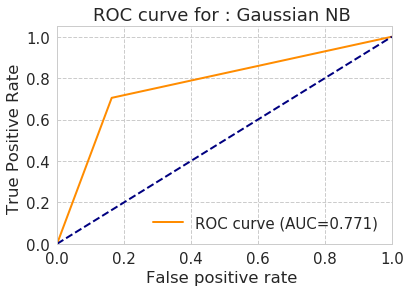

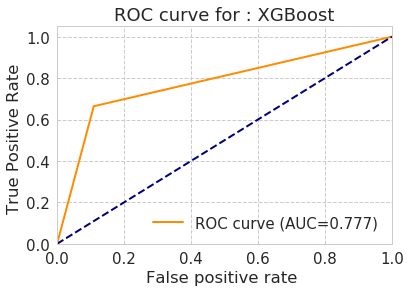

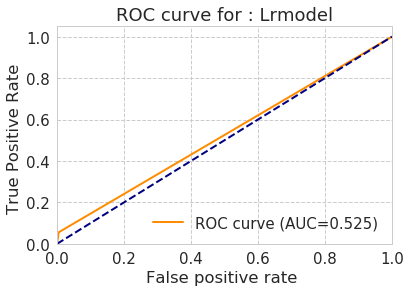

In [130]:
import seaborn as sns
plot_roc(y,GNB)
plot_roc(y,XGB) 
plot_roc(y,Lr) 


Confusion Matrix Stats : Gaussian NB 
NOT_SURVIVE/NOT_SURVIVE: 83.68% (359/429)
NOT_SURVIVE/SURVIVE: 16.32% (70/429)
SURVIVE/NOT_SURVIVE: 29.52% (80/271)
SURVIVE/SURVIVE: 70.48% (191/271)

Confusion Matrix Stats : XGBoost
NOT_SURVIVE/NOT_SURVIVE: 89.04% (382/429)
NOT_SURVIVE/SURVIVE: 10.96% (47/429)
SURVIVE/NOT_SURVIVE: 33.58% (91/271)
SURVIVE/SURVIVE: 66.42% (180/271)

Confusion Matrix Stats : Lrmodel
NOT_SURVIVE/NOT_SURVIVE: 99.53% (427/429)
NOT_SURVIVE/SURVIVE: 0.47% (2/429)
SURVIVE/NOT_SURVIVE: 94.46% (256/271)
SURVIVE/SURVIVE: 5.54% (15/271)


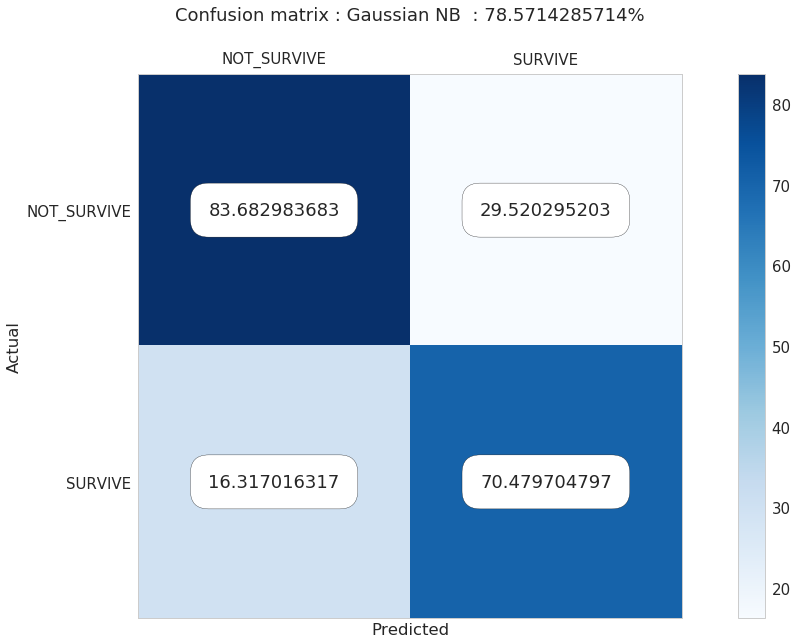

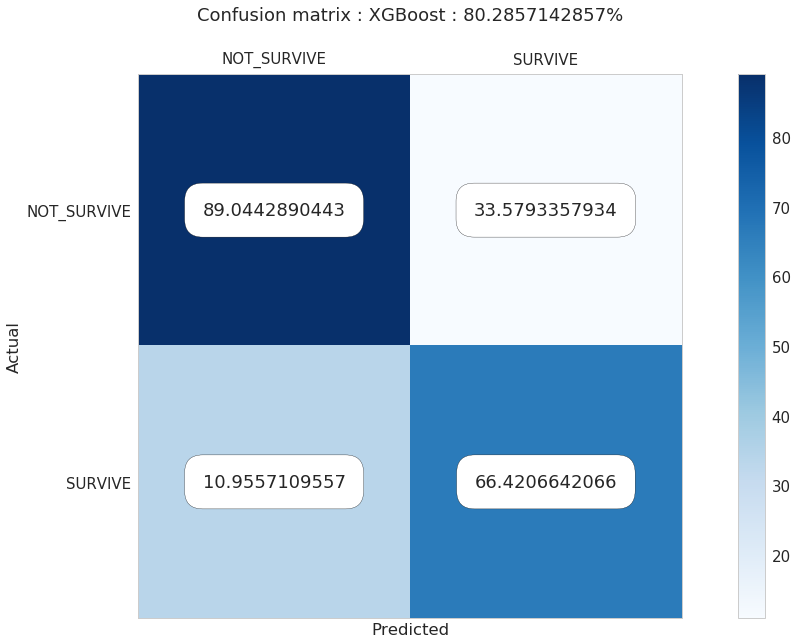

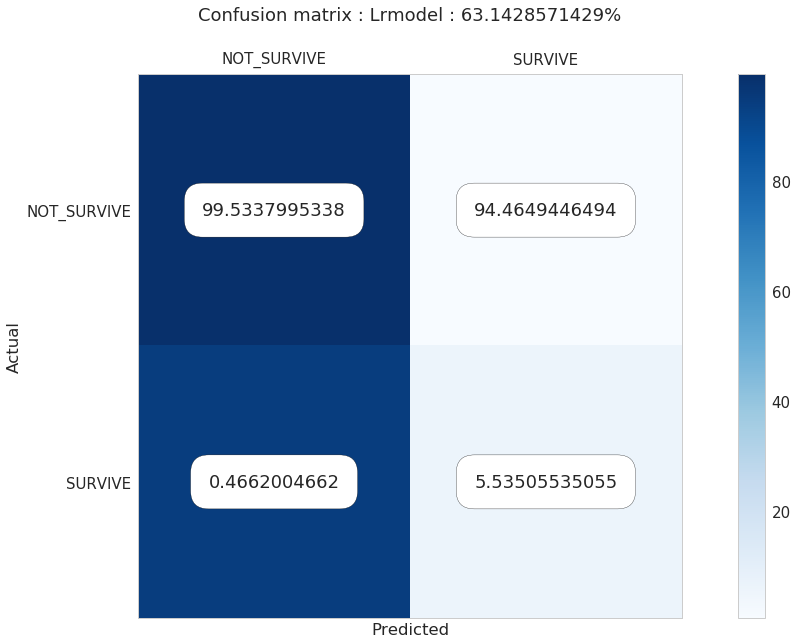

In [135]:
labels = ['NOT_SURVIVE', 'SURVIVE']    
plot_cm(y, GNB, labels)
plot_cm(y, XGB, labels)
plot_cm(y,Lr,labels) 